In [1]:
import numpy as np
from sklearn import svm
import joblib
import os
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("Configurations"))))
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("utils"))))
import Configurations
from utils import modelUtils

Configuration report:
Number of Subgroups is: 7
The Trend Simulation Formel is: x*1.3+10


In [2]:
x, y, test_x, test_y = modelUtils.getTrainAndTestData()

In [31]:
# cut data for prediction
# DataPoinstsNumber = 4
# x = x[:,0:DataPoinstsNumber]
# test_x = test_x[:,0:DataPoinstsNumber]

In [32]:
def transform_y_to_one_dimension(y):
    y_transformed = y * [1,2,3,4,5]
    y_d1 = np.max(y_transformed, axis=1)
    return y_d1

def transform_y_to_binary(y):
    transformed_y = []
    for decimal_y in y:
        binary_y = [0,0,0,0,0]
        binary_y[int(decimal_y)-1] = 1
        transformed_y.append(binary_y)
    return np.asanyarray(transformed_y)

In [3]:
model = svm.SVC()
model.fit(x, modelUtils.transform_y_to_one_dimension(y))

SVC()

In [4]:
# save the model to disk
filename = '../'+Configurations.model_output_path+'/svm_model.sav'
#joblib.dump(model, open(filename, 'wb'))
 

 
# load the model from disk
#model = joblib.load(open(filename, 'rb'))
result = model.score(test_x, modelUtils.transform_y_to_one_dimension(test_y))
print(result)

0.9652


In [35]:

one_dimension_pred_y  = model.predict(test_x)
predictions = modelUtils.transform_y_to_binary(one_dimension_pred_y )
#print(y_pred)
# predictions = predict(pred)
# print(predictions)
# label=modelUtils.getDetectionLabel_for_5y(predictions)
# print(label)
accurancy,_,report = modelUtils.getMetric(predictions,test_y)
print(report)

0.9666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       0.94      0.97      0.96      1000
           3       0.95      0.97      0.96      1000
           4       0.95      0.89      0.92      1000

    accuracy                           0.97      5000
   macro avg       0.97      0.97      0.97      5000
weighted avg       0.97      0.97      0.97      5000



NameError: name 'transform_one_y' is not defined

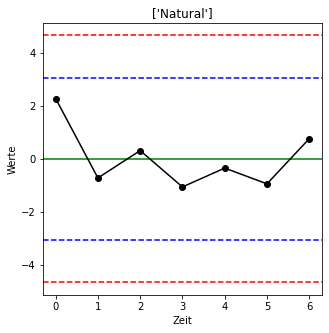

In [36]:
chart,target,label = modelUtils. getRandomChart(x,y,True)
y_pred = model.predict(chart)
res =transform_one_y(y_pred)
print(res)